In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.cluster.hierarchy import dendrogram
from scipy.stats import entropy
from sklearn import cluster, datasets, metrics

In [2]:
df = pd.read_table('abalone.data',sep=',', names=['sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])
df

,sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


<Figure size 3600x2160 with 0 Axes>

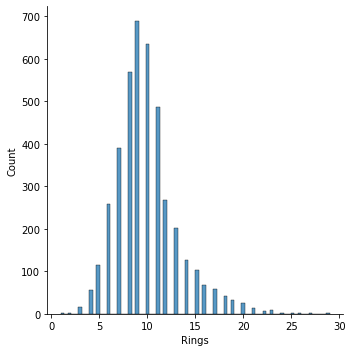

In [3]:
plt.figure(figsize=(50,30))  
sns.displot(df['Rings'])
plt.show()

In [4]:
RingsList = df['Rings'].tolist()  
bins = [0,8,18,30]
Rings_cut = pd.cut(RingsList, bins, labels=['fry','adultfish','oldfish' ])
df['Rings'] = Rings_cut
df

,sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,adultfish
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,fry
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,adultfish
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,adultfish
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,fry
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,adultfish
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,adultfish
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,adultfish
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,adultfish


Text(0.5, 1.0, 'fishage')

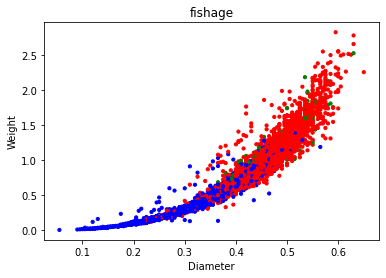

In [5]:

colors = {'fry':'blue', 'adultfish':'red', 'oldfish':'green'}
plt.scatter(df.iloc[:, 2], df.iloc[:,4], color=df['Rings'].map(colors), s=10)
plt.xlabel('Diameter')  
plt.ylabel('Weight') 
plt.title('fishage')


In [6]:
pd.get_dummies(df['sex'])
onehot_encoding_sex = pd.get_dummies(df['sex'], prefix = 'sex')
df = pd.concat([onehot_encoding_sex, df], axis=1)
df=df.drop(columns=['sex'])
#df

In [7]:
df1 = df.iloc[:, :10]
#df1

In [8]:
scaler = MinMaxScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)
df1_MinMax = pd.DataFrame(data=scaled_features, columns=['sex_F','sex_I','sex_M','Length','Diameter','Height','Whole weight	','Shucked weight','Viscera weight','Shell weight'
                                                        ])
X=df1_MinMax
y = np.array(df['Rings'].factorize()[0])

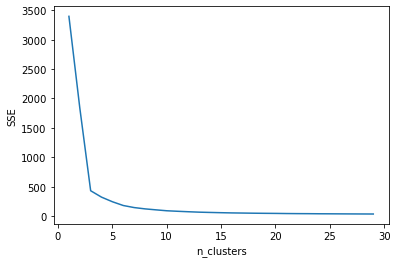

In [9]:
#kmean最佳k值
sse = []
ks = range(1, 30)
for k in ks:
    kmeans = KMeans(n_clusters = k).fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1,30), sse)
plt.xlabel("n_clusters")
plt.ylabel("SSE")
plt.show()


In [42]:
#K-means
start = time.time()
kmeansModel = KMeans(n_clusters=3)
clusters_pred = kmeansModel.fit_predict(X)
print("分群所花費時間:")
end = time.time()
print(end - start)
print("分群結果：")
print(kmeansModel.labels_)
print(y)
print("SSE:",kmeansModel.inertia_)
silhouette_avg = metrics.silhouette_score(X, clusters_pred)
print("Silhouette係數:",silhouette_avg) #值在1~-1之間，越接近1越好
acc=metrics.accuracy_score(clusters_pred,y)
print("accuracy_score:",acc)

分群所花費時間:
0.052832841873168945
分群結果：
[2 2 0 ... 2 0 2]
[0 1 0 ... 0 0 0]
SSE: 429.02540933762907
Silhouette係數: 0.7501903767954611
accuracy_score: 0.48790998324156093


Text(0.5, 1.0, 'K-means Diameter and Weight ')

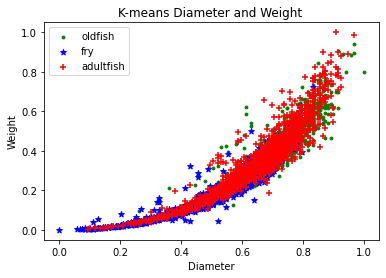

In [43]:
x0 = X[kmeansModel.labels_ == 0]
x1 = X[kmeansModel.labels_ == 1]
x2 = X[kmeansModel.labels_ == 2]
plt.scatter(x0.iloc[:, 4], x0.iloc[:, 6], c="green", marker='o', label='oldfish', s=8)  
plt.scatter(x1.iloc[:, 4], x1.iloc[:, 6], c="blue", marker='*', label='fry')  
plt.scatter(x2.iloc[:, 4], x2.iloc[:, 6], c="red", marker='+', label='adultfish')  
plt.xlabel('Diameter')  
plt.ylabel('Weight')  
plt.legend()  
plt.title('K-means Diameter and Weight ')

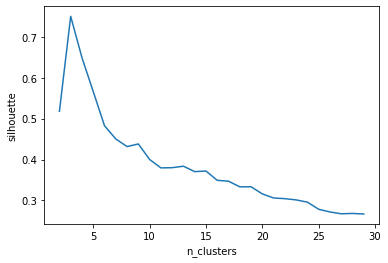

In [24]:
#階層式最佳k值
silhouette = []
ks = range(2, 30)
for k in ks:
    hcluster = AgglomerativeClustering(n_clusters=k,affinity='euclidean')
    hcluster_pred=hcluster.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, hcluster_pred)
    silhouette.append(silhouette_avg)
plt.plot(range(2,30), silhouette)
plt.xlabel("n_clusters")
plt.ylabel("silhouette")
plt.show()

In [32]:
# 階層式
start = time.time()
print("分群所花費時間:")
hcluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean')
hcluster_pred=hcluster.fit_predict(X)
end = time.time()
print(end - start)
label_pred = hcluster.labels_  # cluster標籤
print("階層式分群結果：")
print(label_pred)
silhouette_avg = metrics.silhouette_score(X, hcluster_pred)
print("Silhouette係數:",silhouette_avg) #值在1~-1之間，越接近1越好
acc=metrics.accuracy_score(hcluster_pred,y)
print("accuracy_score:",acc)


分群所花費時間:
0.6154637336730957
階層式分群結果：
[0 0 2 ... 0 2 0]
Silhouette係數: 0.7501903767954611
accuracy_score: 0.5161599233899928


Text(0.5, 1.0, 'hcluster Diameter and Weight ')

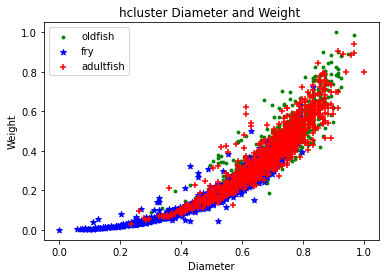

In [33]:
x0 = X[hcluster.labels_ == 0]
x1 = X[hcluster.labels_ == 1]
x2 = X[hcluster.labels_ == 2]
plt.scatter(x0.iloc[:, 4], x0.iloc[:, 6], c="green", marker='o', label='oldfish', s=8)  
plt.scatter(x1.iloc[:, 4], x1.iloc[:, 6], c="blue", marker='*', label='fry')  
plt.scatter(x2.iloc[:, 4], x2.iloc[:, 6], c="red", marker='+', label='adultfish')  
plt.xlabel('Diameter')  
plt.ylabel('Weight')  
plt.legend()  
plt.title('hcluster Diameter and Weight ')

13.224008798599243


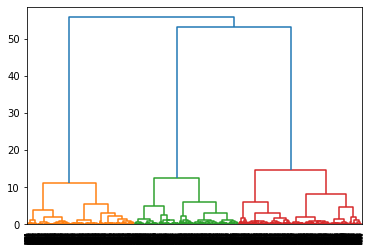

In [15]:
start = time.time()
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
end = time.time()
print(end - start)
plt.show()

In [34]:
# DBSCAN
start = time.time()
print("分群所花費時間:")

dbscan = DBSCAN(eps=0.5,min_samples=5)  
dbscan_pred = dbscan.fit_predict(X)
end = time.time()
print(end - start)

label_pred = dbscan.labels_  
print("DBSCAN分群結果：")
print(label_pred)
silhouette_avg = metrics.silhouette_score(X,dbscan_pred)
print("Silhouette係數:",silhouette_avg)
#plt.scatter(X.values[:,4],X.values[:,6],c=dbscan_pred)
acc=metrics.accuracy_score(dbscan_pred,y)
print("accuracy_score:",acc)

分群所花費時間:
0.3621499538421631
DBSCAN分群結果：
[0 0 1 ... 0 1 0]
Silhouette係數: 0.7104697985347316
accuracy_score: 0.32966243715585347


In [17]:
x0 = X[dbscan_pred == 0]
dbscan_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [18]:
n_clusters_ = len(set(dbscan.labels_ )) - (1 if -1 in dbscan.labels_  else 0)
print("DBSCAN群數為: %d" % n_clusters_)

DBSCAN群數為: 3


Text(0.5, 1.0, 'DBSCAN Diameter and Weight ')

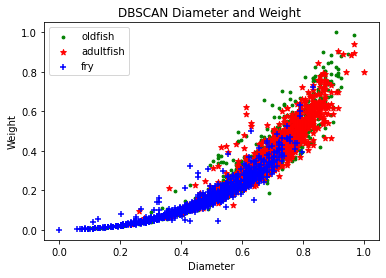

In [19]:
x0 = X[dbscan_pred == 0]
x1 = X[dbscan_pred == 1]
x2 = X[dbscan_pred == 2]
plt.scatter(x0.iloc[:, 4], x0.iloc[:, 6], c="green", marker='o', label='oldfish', s=8)  
plt.scatter(x1.iloc[:, 4], x1.iloc[:, 6], c="red", marker='*', label='adultfish')  
plt.scatter(x2.iloc[:, 4], x2.iloc[:, 6], c="blue", marker='+', label='fry') 
plt.xlabel('Diameter')  
plt.ylabel('Weight')  
plt.legend()  
plt.title('DBSCAN Diameter and Weight ')